# Exercise 1

Plot the function

$$
f(x) = \cos(\pi \theta x) \exp(-x)
$$

over the interval $ [0, 5] $ for each $ \theta $ in `np.linspace(0, 2, 10)`.

Place all the curves in the same figure.

The output should look like this

![](matplotlib_ex1.png)

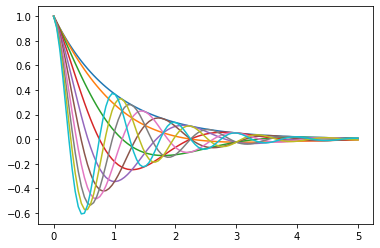

In [66]:
import numpy as np 
import matplotlib.pylab as plt

theta=np.linspace(0,2,10)
x=np.linspace(0,5,100)

for i in range(len(theta)):
    f=np.cos(np.pi*theta[i]*x)*np.exp(-x)
    plt.plot(x,f)


# Exercise 2

Reproduce the plot below:

![](federer.png)

Given the `data/tennis.csv` file.

Note that the y axis is the ration of `double faults` that Federer did over his `total points total` in a match

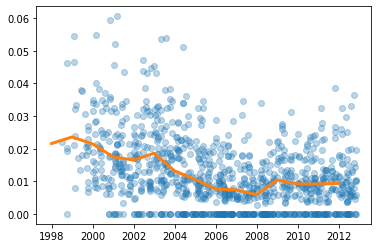

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
df=pd.read_csv('data/tennis.csv')

df['ratio']=df['player1 double faults']/df['player1 total points total']
df['start date']=pd.to_datetime(df['start date'])

y=df.groupby('year').mean().ratio


plt.plot(df['start date'],df['ratio'],'o',alpha=0.3)
y.index = pd.to_datetime(y.index,format='%Y')
plt.plot(y,'-',linewidth=3)



# Exercise 3

With these imports:

```python
import datetime as dt
from pandas_datareader import data
```

If needed, install the datareader with

```
!pip install --upgrade pandas-datareader
```

Write a program to calculate the percentage price change over 2019 for the following shares:

```python
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}
```               

Here’s the first part of the program:

```python
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
```

Complete the program to plot the result as a bar graph like this one for each:

![](pandas_share_prices.png)


In [69]:
import datetime as dt
from pandas_datareader import data

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()
    
    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker
    

y = read_data(ticker_list)


Text(0, 0.5, 'percentage change in price ')

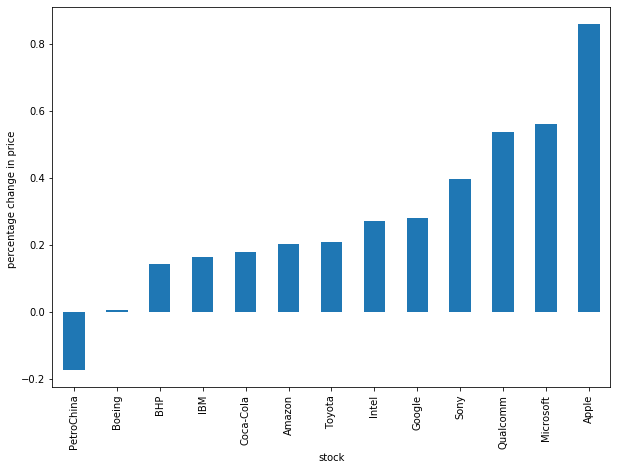

In [70]:
y_0=y.iloc[0]
y_1=y.iloc[-1]
var_y=(y_1-y_0)/y_0
var_y=var_y.sort_values()
var_y=var_y.rename(index=ticker_list)
var_y.plot.bar(figsize=(10,7))
plt.xlabel('stock')
plt.ylabel('percentage change in price ')


# Exercise 4

Using the method `read_data` introduced in Exercise 1, write a program to obtain year-on-year percentage change for the following indices:

```
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}
```

Complete the program to show summary statistics and plot the result as a time series graph like this one:

![](pandas_indices_pctchange.png)

In [71]:
from datetime import datetime


def read_data(ticker_list,
          start,
          end):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo',start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

indices_data = read_data(
        indices_list,
        start=pd.datetime(1970, 1, 1),
        end=pd.datetime( 2020, 12, 31)
)




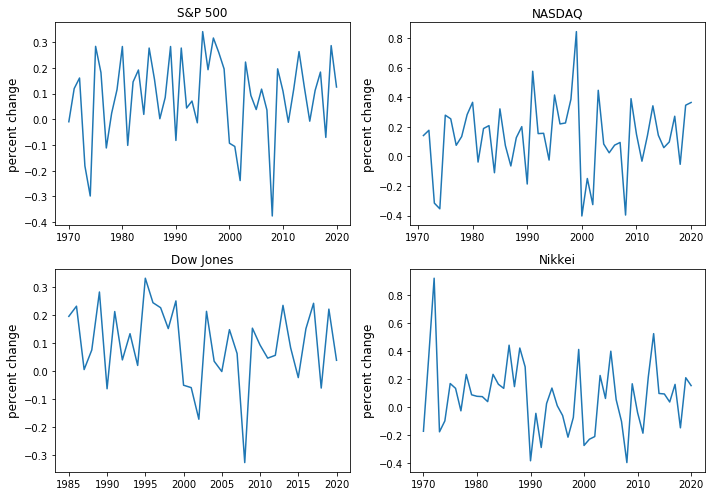

In [72]:

df = pd.DataFrame()

for a, name in indices_list.items():
    # Get the first value of the every years 
    p1 = indices_data.groupby(indices_data.index.year)[a].first()  
    # Get the last value of the every years 
    p2 = indices_data.groupby(indices_data.index.year)[a].last()   
    returns = (p2 - p1) / p1
    df[name] = returns


fig, axes = plt.subplots(2, 2,figsize=(10, 7))
axes=axes.flatten()
indices=df.columns
for i in range(len(axes)):
    axes[i].plot(df[indices[i]])
    axes[i].set_ylabel("percent change", fontsize = 12)
    axes[i].set_title(indices[i])
plt.tight_layout() 


# Exercise 5: Multi Plot

Recall exercise 2's plot.

Make the same plot tracking double faults over time, except make one such plot for each surface type (indoor hard, outdoor clay, etc.)

Have all 6 plots (one per surface type) be in the same matplotlib figure together, similar to the plot we saw in part 4 of the lecture.

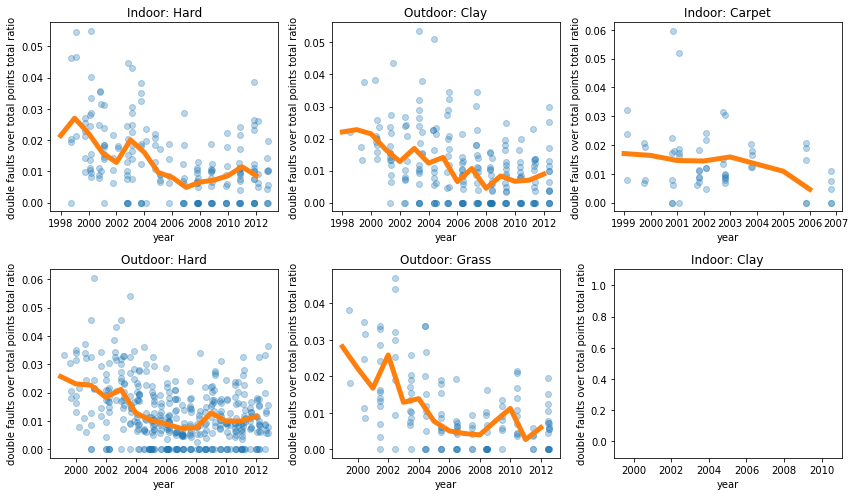

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
df=pd.read_csv('data/tennis.csv')

#diff type of surfaces
surface=df['surface'].unique()
fig, axes = plt.subplots(2, 3,figsize=(12, 7))
axes=axes.flatten()

for i in range(len(surface)):
    df2=df.loc[df['surface']==surface[i]]
    df2['ratio']=df2['player1 double faults']/df2['player1 total points total']
    df2['start date']=pd.to_datetime(df2['start date'])
    y=df2.groupby('year').mean().ratio
    y.index = pd.to_datetime(y.index,format="%Y")

    axes[i].plot(df2['start date'],df2['ratio'],'o',alpha=0.3)
    axes[i].plot(y,'-',linewidth=5)
    axes[i].set_ylabel('double faults over total points total ratio')
    axes[i].set_xlabel('year')
    axes[i].set_title(surface[i])


plt.tight_layout() 